## Obtain filtered list of characters

#### Import stuff

In [174]:
import pickle
import classes
import pandas as pd

#### Scrape characters

In [218]:
# Set up filter
char_filter = classes.CharFilter()
char_filter.winner = True
char_filter.difficulty = 'insane'
char_filter.char_class = 'Necromancer'
char_filter.campaign='majeyal'
char_filter.max_urls = 1000

characters = classes.CharacterList(list())

versions = ['1.7.6', '1.7.5', '1.7.4', '1.7.3', '1.7.2', '1.7.1', '1.7.0']

# Loop over versions, may want to include this in the CharFilter class in the future
for version in versions:
    
    char_filter.version = version
    characters += char_filter.get_characters()


# Save characters to pickle
with open(f'necromancer.pkl', 'wb') as fp:
    pickle.dump(characters, fp)


Extracting character urls...
Now at 0 characters. Extracting characters from page 0...
Now at 25 characters. Extracting characters from page 1...
Now at 48 characters. Extracting characters from page 2...
Page 2 is empty. Ending...
Beginning to extract https://te4.org//characters/154049/tome/662a9317-16d9-4a9e-a4cb-2a743f8476e0...
Beginning to extract https://te4.org//characters/241862/tome/d6e57ece-55b4-4f88-b403-e44874b41aa4...
Something went wrong extracting the skill tree (Probably a non-english character)
'NoneType' object has no attribute 'decompose'
Beginning to extract https://te4.org//characters/291562/tome/f94f5c4e-c7c7-45a1-aa7e-58543df73918...
Beginning to extract https://te4.org//characters/107553/tome/4c0f593b-7fda-41da-8616-70146b734335...
Beginning to extract https://te4.org//characters/331218/tome/f33eb6fe-3d92-46b8-a9f3-98db4275f426...
Something went wrong extracting the skill tree (Probably a non-english character)
'NoneType' object has no attribute 'decompose'
Somet

#### Load saved characters

In [2]:
# open a file, where you stored the pickled data
file = open('test.pkl', 'rb')

# dump information to that file
characters = pickle.load(file)

# close the file
file.close()

#### Clean list of characters

In [219]:
characters.clean_characters()

Threw Zh the level 50 Lich Necromancer by Zhaen1 away, too many prodigies
Threw Drenarirain the level 50 Lich Necromancer by choich away, too many prodigies
Threw Artethmae the level 50 Lich Necromancer by vhite away, too many prodigies
Threw Uriel the level 50 Lich Necromancer by Tsukumo Gou away, not english
Threw Neck Romancer the level 50 Higher Necromancer by lildude2014 away, too many prodigies
Threw Venar the level 50 Lich Necromancer by HSmage away, too many prodigies
Threw NECROMANTIC the level 50 Lich Necromancer by Ratepe away, too many prodigies
Threw Gltadir the level 50 Skeleton Necromancer by danagile away, too many prodigies
Threw Spooky Dude the level 50 Dread Necromancer by Sembencha away, too many prodigies
Threw marigold the level 50 Lich Necromancer by marigold away, too many prodigies
Threw Ghoulomancer the level 50 Ghoul Necromancer by jammer312 away, too many prodigies
Threw real (alert) real the level 50 Lich Necromancer by Traumatic Tuna away, too many prodigi

## Analysis

#### Summary of list

In [220]:
characters.print_summary(num=5)

Races: 	Lich (82.1)%, Ghoul (3.4)%, Skeleton (3.1)%, Cornac (2.5)%, Whitehoof (2.0)%, 
Prodigies: 	#SANDY_BROWN#Lich (Race Evolution) (82.1)%, Adept (53.4)%, Blighted Summoning (20.7)%, Ethereal Form (14.8)%, Armour of Shadows (8.7)%, 
inscriptions: 	Rune: Shatter Afflictions (121.8)%, Rune: Dissipation (71.5)%, Rune: Reflection Shield (60.1)%, Rune: Stormshield (51.4)%, Rune: Shielding (45.0)%, 


#### Races

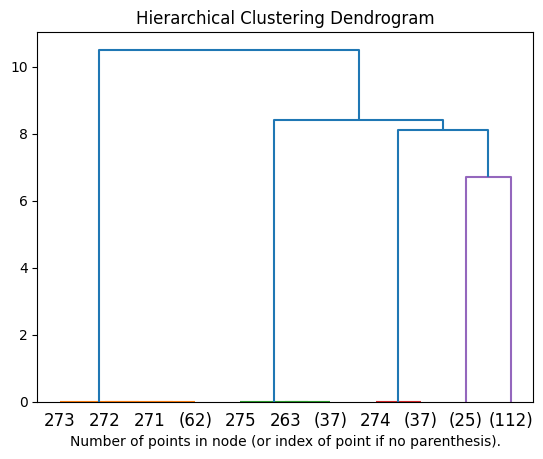

Index(['Kruk Ghoul', 'Thalore', 'Yeek', 'Prismatic Golem', 'Orc', 'Cornac',
       'Krog', 'Doomelf', 'Kruk Yeti', 'Drem', 'Cursed Gnome', 'Hulk',
       'Whitehoof', 'Ghoul', 'Ogre', 'Skeleton', 'Shalore', 'Dwarf', 'Higher',
       'Halfling'],
      dtype='object')

In [173]:
characters.print_dendrogram("race")
df = characters.get_encoded_feature_df("race")
df.columns



#### Prodigies

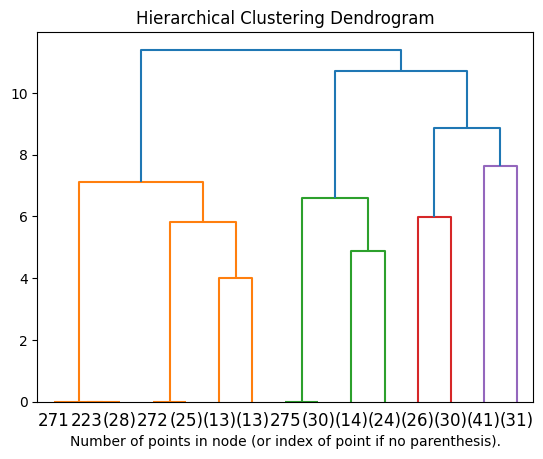

		 Prodigy 1 			 Prodigy 2
Cluster 1 	 Aether Permeation
Cluster 2 	 Ethereal Form
Cluster 3 	 #LIGHT_STEEL_BLUE#High Thaumaturgist (Class Evolution)
Cluster 4 	 Arcane Amplification Drone
Cluster 5 	 Adept 	 #LIGHT_STEEL_BLUE#Technomancer (Class Evolution)


Elemental Surge                                           0.048780
Ethereal Form                                             0.000000
Cauterize                                                 0.121951
Corrupted Shell                                           0.048780
Draconic Will                                             0.024390
#LIGHT_STEEL_BLUE#High Thaumaturgist (Class Evolution)    0.000000
Windtouched Speed                                         0.048780
Swift Hands                                               0.024390
Windblade                                                 0.024390
Arcane Amplification Drone                                0.000000
Unbreakable Will                                          0.000000
Adept                                                     0.682927
Aether Permeation                                         0.000000
#LIGHT_STEEL_BLUE#Technomancer (Class Evolution)          0.682927
Master of Disasters                                       0.09

In [22]:
characters.print_dendrogram("prodigies")
means, closest = characters.get_cluster_centers_and_closest_observations(features='prodigies', num_clusters=5)

def get_prodigies(series):
    
    prodigies = list()
    
    for prodigy, value in series.items():
        if value == 1:
            prodigies.append(prodigy)
            
    return prodigies

def print_closest_observations(closest_observations):
    
    print('\t\t Prodigy 1 \t\t\t Prodigy 2')
    
    for cluster, closest in enumerate(closest_observations):
        prodigies = get_prodigies(closest)

        prodigies_string = ''
        
        for prodigy in prodigies:
            prodigies_string += f' \t {prodigy}'
        
        print(f"Cluster {cluster+1}{prodigies_string}")
        
print_closest_observations(closest)

model = characters.get_cluster_model(features='prodigies', num_clusters=5)
model.labels_

means[4]


#### Inscriptions

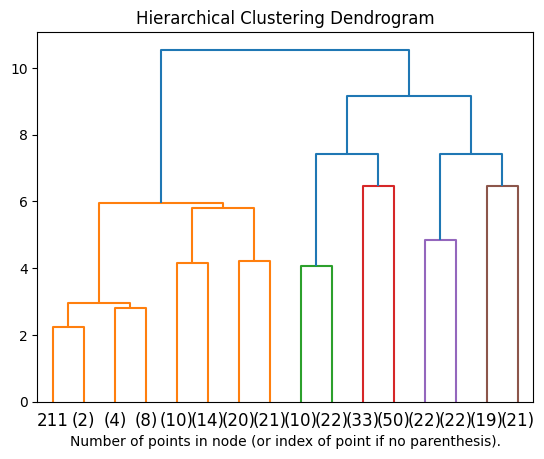

In [15]:
characters.print_dendrogram('inscriptions')

#### Talents

##### Class Talents

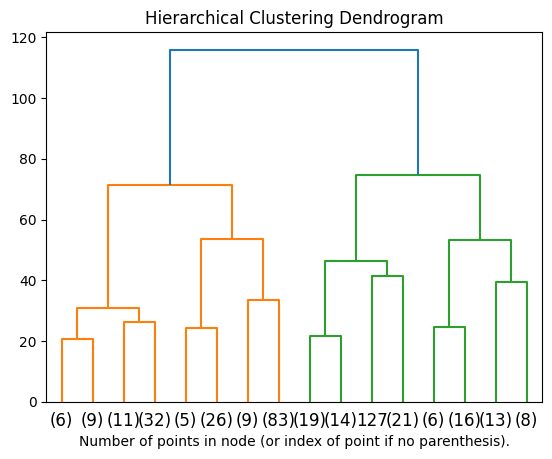

In [14]:
characters.print_dendrogram('class talents')

##### Generic Talents

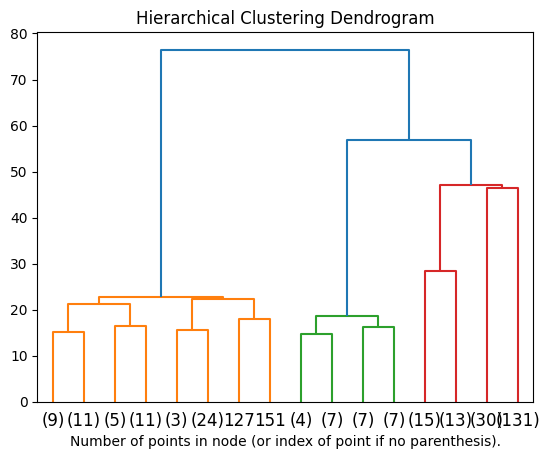

In [13]:
characters.print_dendrogram('generic talents')

#### Total

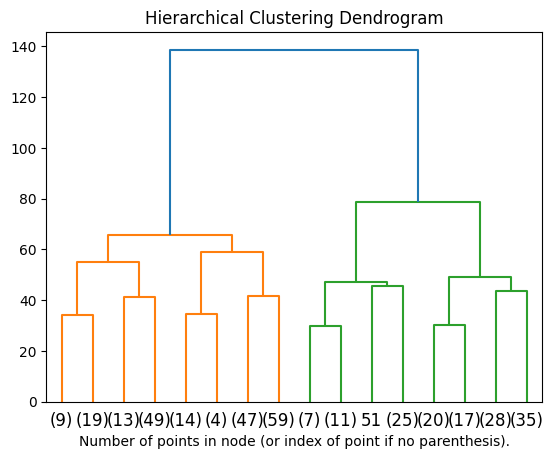

In [211]:
features = ['race', 'class talents', 'generic talents', 'prodigies']
weights = [1,1,1,5]
characters.print_dendrogram(features, weights)

# Export build to excel file with different working sheet for each cluster 

In [221]:
features = ['race', 'class talents', 'generic talents', 'prodigies']
weights = [1,1,1,5]
num_clusters = 6
means, closest = characters.get_cluster_centers_and_closest_observations(features=features, weights = weights, num_clusters=num_clusters)
        
def print_closest_observation(charList, char_series):
    
    ## Race
    races_in_list = charList.race_dict.keys()
    races_in_series = [x for x in races_in_list if x in char_series.index]
    
    for race in races_in_series:
        try:
            if char_series[race] != 0:
                print(f"Race: {race}")
        except Exception as e:
            print(e)
            
    
    ## Prodigies
    prodigies_in_list = charList.prodigy_dict.keys()
    prodigies_in_series = [x for x in prodigies_in_list if x in char_series.index]

    prodigies = []
    for prod in prodigies_in_series:
        if char_series[prod] != 0:
            prodigies.append(prod)
    
    print("Prodigies:")
    for prodigy in prodigies:
        print(f"\t{prodigy}")
    
    ## Class talents
    print("Class talents:")
    for tree, talents_list in charList.class_talents_dict.items():
        if char_series[tree] != 0:
            print(f"\t{tree}")
            for talent in talents_list:
                print(f"\t \t {talent:<30}: \t {char_series[talent]}")
    
    
    ## Generic talents # Need to remove redundant class trees
    print("Generic talents:")
    for tree, talents_list in charList.generic_talents_dict.items():
        if char_series[tree] != 0:
            print(f"\t{tree}")
            for talent in talents_list:
                print(f"\t \t {talent:<30}: \t {char_series[talent]}")

import copy
import numpy as np

def get_converted_mean(charList, series):
    
    # Make a deep copy of the series
    char_series = copy.deepcopy(series)
    
    ## Convert Race
    races_in_list = charList.race_dict.keys()
    races_in_series = [x for x in races_in_list if x in char_series.index]
    races_sorted = sorted(races_in_series, key=lambda race: char_series[race], reverse=True)
    races_sorted.extend(['Whitehooves', 'Yeti'])
    
    # Set tree value to 0 for all but the most important race
    for race in races_in_series:
        if race == races_sorted[0]:
            char_series[race] = 1
        else:
            char_series[race] = 0
    
    # Set race talents to zero for all but the most important race     
    for index in char_series.index:
        if '/' in index and any(race in index for race in races_sorted[1:]):
            char_series[index] = 0
            for talent in charList.generic_talents_dict[index]:
                char_series[talent] = 0
    
    ## Convert Prodigies
    
    prodigies_in_list = charList.prodigy_dict.keys()
    prodigies_in_series = [x for x in prodigies_in_list if x in char_series.index]
    prodigies_sorted = sorted(prodigies_in_series, key=lambda prod: char_series[prod], reverse=True)
    
    # Loop over the prodigies in the series
    for prod in prodigies_in_series:
        if prod in prodigies_sorted[:2]:
            char_series[prod] = 1
        else:
            char_series[prod] = 0
    
    ## Convert class and generic talents
    type_dict = {'class talents': charList.class_talents_dict.values(),
            'generic talents': charList.generic_talents_dict.values()}
    
    for type in ['class talents', 'generic talents']:
    
        type_talents = list()
        for talents in type_dict[type]:
            type_talents.extend(talents)
        
        # Back-up series
        rounded_down = 0
        rounded_down_dict = {}
        
        # Round talents down
        for talent in type_talents:
            
            after_decimal = char_series[talent] % 1
            char_series[talent] = np.floor(char_series[talent])
            
            rounded_down += after_decimal
            rounded_down_dict[talent] = after_decimal
        
        # Sort class talents by how much has been rounded
        type_talents_ordered = sorted(rounded_down_dict, key=rounded_down_dict.get, reverse=True)
        
        # Redistribute
        for talent in type_talents_ordered:
            
            char_series[talent] += 1
            
            rounded_down -= rounded_down_dict[talent]
            
            if rounded_down < 1:
                break
        
    return char_series
    
#print_closest_observation(characters, closest[3])
mean_converted = get_converted_mean(characters, means[2])
print_closest_observation(characters, mean_converted)

# Make extra class for a series and add these functions there probably

Race: Ghoul
Prodigies:
	Adept
	Blighted Summoning
Class talents:
	Spell / Glacial waste
	 	 Hiemal Shield                 : 	 3.0
	 	 Desolate Waste                : 	 1.0
	 	 Crumbling Earth               : 	 1.0
	 	 Bleak Guard                   : 	 2.0
	Spell / Master of flesh
	 	 Call of the Mausoleum         : 	 4.0
	 	 Corpse Explosion              : 	 1.0
	 	 Putrescent Liquefaction       : 	 1.0
	 	 Discarded Refuse              : 	 1.0
	Spell / Nightfall
	 	 Invoke Darkness               : 	 3.0
	 	 Night Sphere                  : 	 2.0
	 	 Erupting Shadows              : 	 1.0
	 	 River of Souls                : 	 1.0
	Spell / Dreadmaster
	 	 Dread                         : 	 1.0
	 	 Souleater                     : 	 1.0
	 	 Neverending Peril             : 	 1.0
	 	 Dreadmaster                   : 	 2.0
	Spell / Age of dusk
	 	 Dire Plague                   : 	 2.0
	 	 Crepuscule                    : 	 2.0
	 	 The End of All Hope           : 	 1.0
	 	 Golden Age of Necromancy

In [186]:
a = [1,2,3,4]
a[1:]
     

[2, 3, 4]